In [1]:
#jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'f3275e07-c3d0-4916-886f-7ecc5f86a230',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [2]:
type(data)

dict

In [3]:
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df =pd.json_normalize(data['data'])
df['timestamp']= pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10974,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.967781e+07,1.967781e+07,False,NaN,1,NaN,NaN,None,2024-04-09T13:54:00.000Z,70383.381840,3.279770e+10,-6.0107,-0.706029,-2.275802,8.225608,1.076379,48.238936,55.860512,1.384991e+12,52.4043,1.478051e+12,None,2024-04-09T13:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-09 09:54:36.699075
1,1027,Ethereum,ETH,ethereum,8756,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.200705e+08,1.200705e+08,True,NaN,2,NaN,NaN,None,2024-04-09T13:53:00.000Z,3611.068709,1.739127e+10,5.2497,-0.813341,-0.310107,10.889900,-7.668579,43.628595,51.648653,4.335827e+11,16.4185,4.335827e+11,None,2024-04-09T13:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-09 09:54:36.699075
2,825,Tether USDt,USDT,tether,82000,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.070517e+11,1.109426e+11,True,NaN,3,NaN,NaN,None,2024-04-09T13:53:00.000Z,1.000060,6.642464e+10,2.2863,-0.003858,0.033670,0.033181,-0.175973,0.005615,-0.057584,1.070581e+11,4.0540,1.109493e+11,None,2024-04-09T13:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-09 09:54:36.699075
3,1839,BNB,BNB,bnb,2139,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495348e+08,1.495348e+08,False,NaN,4,NaN,NaN,None,2024-04-09T13:53:00.000Z,582.542698,1.912129e+09,11.2183,-0.376531,-1.886789,5.773872,9.891616,79.322607,98.914593,8.711040e+10,3.2986,8.711040e+10,None,2024-04-09T13:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-09 09:54:36.699075
4,5426,Solana,SOL,solana,649,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.455678e+08,5.734951e+08,True,NaN,5,NaN,NaN,None,2024-04-09T13:53:00.000Z,174.755554,2.262414e+09,-15.3423,-0.791031,-3.643873,-1.731572,20.586672,65.296384,86.073765,7.786544e+10,2.9485,1.002215e+11,None,2024-04-09T13:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-09 09:54:36.699075
5,52,XRP,XRP,xrp,1292,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.505155e+10,9.998772e+10,False,NaN,6,NaN,NaN,None,2024-04-09T13:54:00.000Z,0.627618,2.403105e+09,43.9160,-0.941469,2.115545,7.585993,2.022429,19.793804,13.246289,3.455132e+10,1.3084,6.276175e+10,None,2024-04-09T13:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-09 09:54:36.699075
6,3408,USDC,USDC,usd-coin,18032,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.257415e+10,3.257415e+10,False,NaN,7,NaN,NaN,None,2024-04-09T13:52:00.000Z,0.999987,7.495146e+09,0.4075,-0.022091,-0.008862,-0.016948,0.003078,-0.029486,-0.029565,3.257372e+10,1.2335,3.257372e+10,None,2024-04-09T13:52:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-09 09:54:36.699075
7,74,Dogecoin,DOGE,dogecoin,947,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.438149e+11,1.438149e+11,True,NaN,8,NaN,NaN,None,2024-04-09T13:54:00.000Z,0.192482,1.783225e+09,-30.1911,-1.939178,-5.748425,3.921915,12.206724,134.743345,149.101351,2.768181e+10,1.0474,2.768181e+10,None,2024-04-09T13:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-09 09:54:36.699075
8,11419,Toncoin,TON,toncoin,266,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.470668e+

In [5]:

def api_runner():

    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'f3275e07-c3d0-4916-886f-7ecc5f86a230',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    #df2 =pd.json_normalize(data['data'])
    #df2['timestamp']= pd.to_datetime('now')
    #df_append = pd.DataFrame(df2)
    #df = pd.concat([df,df_append])
    
    df =pd.json_normalize(data['data'])
    df['timestamp']= pd.to_datetime('now')
    df
    
    if not os.path.isfile(r"C:\Users\Karim\Desktop\Data Analytics\Python\Scraping Data\API.csv"):
        df.to_csv(r"C:\Users\Karim\Desktop\Data Analytics\Python\Scraping Data\API.csv", header ="column_names")
    else:
        df.to_csv(r"C:\Users\Karim\Desktop\Data Analytics\Python\Scraping Data\API.csv",mode ="a", header =False)
    

In [ ]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("API runner completed")
    sleep(60)
exit()

API runner completed


In [ ]:
df72 = pd.read_csv(r"C:\Users\Karim\Desktop\Data Analytics\Python\Scraping Data\API.csv")
df72

In [ ]:
df

In [23]:
pd.set_option("display.float_format", lambda x: "%.5f" % x)

In [24]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10943,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19664850.00000,19664850.00000,False,NaN,1,NaN,NaN,None,2024-03-26T15:18:00.000Z,69808.89909,41988121446.12109,14.48330,-0.55039,0.84933,11.40594,34.97635,68.69022,62.93456,1372781529203.10522,51.88820,1465986880818.58008,None,2024-03-26T15:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-26 11:18:58.332523
1,1027,Ethereum,ETH,ethereum,8650,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120074016.27550,120074016.27550,True,NaN,2,NaN,NaN,None,2024-03-26T15:17:00.000Z,3570.58953,20713829145.16222,36.14850,-0.74123,0.41806,10.70683,16.53998,58.50396,52.68155,428735024873.68311,16.20530,428735024873.67999,None,2024-03-26T15:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-26 11:18:58.332523
2,825,Tether USDt,USDT,tether,80267,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,104233700559.26607,107792615137.11732,True,NaN,3,NaN,NaN,None,2024-03-26T15:17:00.000Z,0.99990,84648180317.10068,20.87280,-0.00515,-0.03112,0.09511,-0.03789,0.01176,-0.07429,104222949844.88995,3.93940,107781497354.57001,None,2024-03-26T15:17:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-26 11:18:58.332523
3,1839,BNB,BNB,bnb,2124,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149536785.05460,149536785.05460,False,NaN,4,NaN,NaN,None,2024-03-26T15:17:00.000Z,577.05022,2137741257.09843,-8.92720,-1.18913,-2.11542,12.80275,49.84819,90.62514,86.59592,86290234921.24678,3.26160,86290234921.25000,None,2024-03-26T15:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-26 11:18:58.332523
4,5426,Solana,SOL,solana,646,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,444183300.71960,572586294.89164,True,NaN,5,NaN,NaN,None,2024-03-26T15:17:00.000Z,190.75901,3611813874.30679,-9.56920,-1.02996,-0.57444,8.71550,84.05842,107.79892,77.98136,84731966650.43091,3.20870,109225994684.30000,None,2024-03-26T15:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-26 11:18:58.332523
5,52,XRP,XRP,xrp,1277,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54884241878.00000,99987762348.00000,False,NaN,6,NaN,NaN,None,2024-03-26T15:18:00.000Z,0.63211,2237597576.19551,51.74800,-0.94697,-1.53490,6.35942,15.78291,21.59299,0.29991,34692980312.70561,1.31180,63211186172.20000,None,2024-03-26T15:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-26 11:18:58.332523
6,3408,USDC,USDC,usd-coin,17660,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32226620330.11699,32226620330.11699,False,NaN,7,NaN,NaN,None,2024-03-26T15:17:00.000Z,0.99989,8481324474.28188,17.81380,-0.00374,-0.01331,-0.01780,-0.01874,-0.04911,-0.05893,32223129270.53988,1.21800,32223129270.54000,None,2024-03-26T15:17:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-26 11:18:58.332523
7,74,Dogecoin,DOGE,dogecoin,938,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,143626736383.70523,143626736383.70523,True,NaN,8,NaN,NaN,None,2024-03-26T15:18:00.000Z,0.17741,3038751894.27330,16.13870,-2.01788,-2.46277,35.65609,104.52529,123.36811,90.73567,25481177414.43705,0.96310,25481177414.44000,None,2024-03-26T15:18:00.00

In [35]:
df3 =df.groupby("name", sort= False)[["quote.USD.percent_change_1h","quote.USD.percent_change_24h","quote.USD.percent_change_7d","quote.USD.percent_change_30d","quote.USD.percent_change_60d","quote.USD.percent_change_90d"]].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.55039,0.84933,11.40594,34.97635,68.69022,62.93456
Ethereum,-0.74123,0.41806,10.70683,16.53998,58.50396,52.68155
Tether USDt,-0.00515,-0.03112,0.09511,-0.03789,0.01176,-0.07429
BNB,-1.18913,-2.11542,12.80275,49.84819,90.62514,86.59592
Solana,-1.02996,-0.57444,8.71550,84.05842,107.79892,77.98136
XRP,-0.94697,-1.53490,6.35942,15.78291,21.59299,0.29991
USDC,-0.00374,-0.01331,-0.01780,-0.01874,-0.04911,-0.05893
Dogecoin,-2.01788,-2.46277,35.65609,104.52529,123.36811,90.73567
Cardano,-0.98397,0.14792,7.82967,12.29878,36.21033,6.92897


In [36]:
df4 =df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.55039
             quote.USD.percent_change_24h     0.84933
             quote.USD.percent_change_7d     11.40594
             quote.USD.percent_change_30d    34.97635
             quote.USD.percent_change_60d    68.69022
             quote.USD.percent_change_90d    62.93456
Ethereum     quote.USD.percent_change_1h     -0.74123
             quote.USD.percent_change_24h     0.41806
             quote.USD.percent_change_7d     10.70683
             quote.USD.percent_change_30d    16.53998
             quote.USD.percent_change_60d    58.50396
             quote.USD.percent_change_90d    52.68155
Tether USDt  quote.USD.percent_change_1h     -0.00515
             quote.USD.percent_change_24h    -0.03112
             quote.USD.percent_change_7d      0.09511
             quote.USD.percent_change_30d    -0.03789
             quote.USD.percent_change_60d     0.01176
             quote.USD.percent_change_90

In [37]:
type(df3)

pandas.core.frame.DataFrame

In [38]:
type(df4)

pandas.core.series.Series

In [39]:
df5 =df4.to_frame(name = "Values")
df5

Values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.55039
            quote.USD.percent_change_24h   0.84933
            quote.USD.percent_change_7d   11.40594
            quote.USD.percent_change_30d  34.97635
            quote.USD.percent_change_60d  68.69022
            quote.USD.percent_change_90d  62.93456
Ethereum    quote.USD.percent_change_1h   -0.74123
            quote.USD.percent_change_24h   0.41806
            quote.USD.percent_change_7d   10.70683
            quote.USD.percent_change_30d  16.53998
            quote.USD.percent_change_60d  58.50396
            quote.USD.percent_change_90d  52.68155
Tether USDt quote.USD.percent_change_1h   -0.00515
            quote.USD.percent_change_24h  -0.03112
            quote.USD.percent_change_7d    0.09511
            quote.USD.percent_change_30d  -0.03789
            quote.USD.percent_change_60d   0.01176
            quote.USD.percent_change_90d  -0.07429
BNB         quote.USD.percent_change_1h   -1.18913
            quote.USD.percent_change_24h  -2.11542
            quote.USD.percent_change_7d   12.80275
            quote.USD.percent_change_30d  49.84819
            quote.USD.percent_change_60d  90.62514
            quote.USD.percent_change_90d  86.59592
Solana      quote.USD.percent_change_1h   -1.02996
            quote.USD.percent_change_24h  -0.57444
            quote.USD.percent_change_7d    8.71550
            quote.USD.percent_change_30d  84.05842
            quote.USD.percent_change_60d 107.79892
            quote.USD.percent_change_90d  77.98136
XRP         quote.USD.percent_change_1h   -0.94697
            quote.USD.percent_change_24h  -1.53490
            quote.USD.percent_change_7d    6.35942
            quote.USD.percent_change_30d  15.78291
            quote.USD.percent_change_60d  21.59299
            quote.USD.percent_change_90d   0.29991
USDC        quote.USD.percent_change_1h   -0.00374
            quote.USD.percent_change_24h  -0.01331
            quote.USD.percent_change_7d   -0.01780
            quote.USD.percent_change_30d  -0.01874
            quote.USD.percent_change_60d  -0.04911
            quote.USD.percent_change_90d  -0.05893
Dogecoin    quote.USD.percent_change_1h   -2.01788
            quote.USD.percent_change_24h  -2.46277
            quote.USD.percent_change_7d   35.65609
            quote.USD.percent_change_30d 104.52529
            quote.USD.percent_change_60d 123.36811
            quote.USD.percent_change_90d  90.73567
Cardano     quote.USD.percent_change_1h   -0.98397
            quote.USD.percent_change_24h   0.14792
            quote.USD.percent_change_7d    7.82967
            quote.USD.percent_change_30d  12.29878
            quote.USD.percent_change_60d  36.21033
            quote.USD.percent_change_90d   6.92897
Avalanche   quote.USD.percent_change_1h   -0.67428
            quote.USD.percent_change_24h  -2.56467
            quote.USD.percent_change_7d   -1.49265
            quote.USD.percent_change_30d  52.17416
            quote.USD.percent_change_60d  76.21265
            quote.USD.percent_change_90d  30.75361
Toncoin     quote.USD.percent_change_1h   -0.46912
            quote.USD.percent_change_24h  -7.60052
            quote.USD.percent_change_7d   33.83296
            quote.USD.percent_change_30d 142.07810
            quote.USD.percent_change_60d 141.54436
            quote.USD.percent_change_90d 131.92383
Shiba Inu   quote.USD.percent_change_1h   -1.57951
            quote.USD.percent_change_24h   2.42038
            quote.USD.percent_change_7d   18.72757
            quote.USD.percent_change_30d 210.30248
            quote.USD.percent_change_60d 231.32180
            quote.USD.percent_change_90d 178.99495
Polkadot    quote.USD.percent_change_1h   -0.18214
            quote.USD.percent_change_24h   1.68213
            quote.USD.percent_change_7d    8.77774
            quote.USD.percent_change_30d  25.89577
            quote.USD.percent_change_60d  48.43678
            quo

In [40]:
type(df5)

pandas.core.frame.DataFrame

In [41]:
df5.count()

Values    90
dtype: int64

In [47]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,Values
0,Bitcoin,quote.USD.percent_change_1h,-0.55039
1,Bitcoin,quote.USD.percent_change_24h,0.84933
2,Bitcoin,quote.USD.percent_change_7d,11.40594
3,Bitcoin,quote.USD.percent_change_30d,34.97635
4,Bitcoin,quote.USD.percent_change_60d,68.69022
5,Bitcoin,quote.USD.percent_change_90d,62.93456
6,Ethereum,quote.USD.percent_change_1h,-0.74123
7,Ethereum,quote.USD.percent_change_24h,0.41806
8,Ethereum,quote.USD.percent_change_7d,10.70683
9,Ethereum,quote.USD.percent_change_30d,16.53998


In [59]:
df7 = df6.rename(columns={"level_1": "percent_change"})
df7

,name,percent_change,Values
0,Bitcoin,quote.USD.percent_change_1h,-0.55039
1,Bitcoin,quote.USD.percent_change_24h,0.84933
2,Bitcoin,quote.USD.percent_change_7d,11.40594
3,Bitcoin,quote.USD.percent_change_30d,34.97635
4,Bitcoin,quote.USD.percent_change_60d,68.69022
5,Bitcoin,quote.USD.percent_change_90d,62.93456
6,Ethereum,quote.USD.percent_change_1h,-0.74123
7,Ethereum,quote.USD.percent_change_24h,0.41806
8,Ethereum,quote.USD.percent_change_7d,10.70683
9,Ethereum,quote.USD.percent_change_30d,16.53998


In [64]:
df7["percent_change"] = df7["percent_change"].replace(["quote.USD.percent_change_24h","quote.USD.percent_change_7d","quote.USD.percent_change_30d","quote.USD.percent_change_60d","quote.USD.percent_change_90d"], ["24h","7d","30d","60d","90d"])
df7

,name,percent_change,Values
0,Bitcoin,1h,-0.55039
1,Bitcoin,24h,0.84933
2,Bitcoin,7d,11.40594
3,Bitcoin,30d,34.97635
4,Bitcoin,60d,68.69022
5,Bitcoin,90d,62.93456
6,Ethereum,1h,-0.74123
7,Ethereum,24h,0.41806
8,Ethereum,7d,10.70683
9,Ethereum,30d,16.53998


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Karim\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


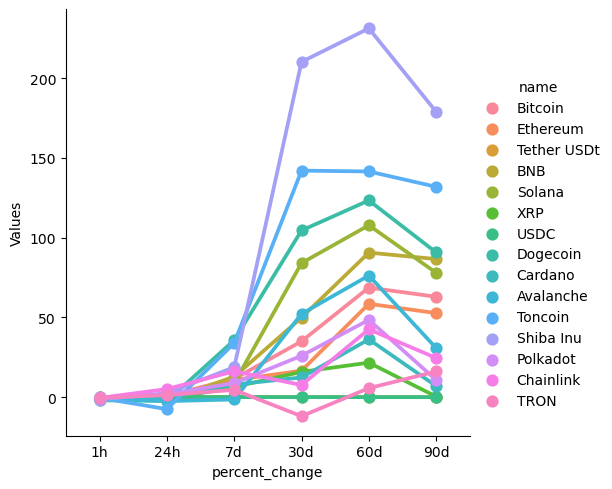

In [65]:
sns.catplot(x ="percent_change", y="Values", hue="name",data=df7, kind="point")

In [86]:
df10 = df[["name","quote.USD.price","timestamp"]]
df10 = df10.query('name == "Bitcoin"')
df10

,name,quote.USD.price,timestamp
0,Bitcoin,69808.89909,2024-03-26 11:18:58.332523


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

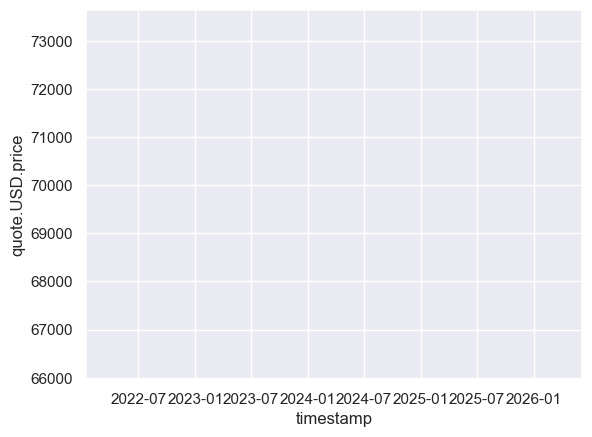

In [87]:
sns.set_theme(style="darkgrid")

sns.lineplot(x="timestamp",y="quote.USD.price", data =df10)